# 선형 회귀

### 정규 방정식을 사용한 선형 회귀

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [8]:
X = 2 * np.random.rand(100, 1)
y = 3 * X + 4 + np.random.randn(100, 1)

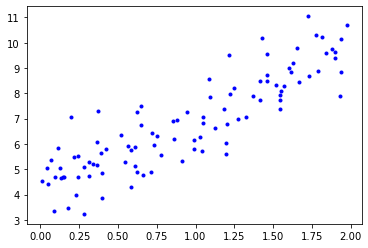

In [9]:
plt.plot(X, y, "b.")

* 넘파이 선형대수 모듈 이용

In [13]:
X_b = np.c_[np.ones((100, 1)), X]

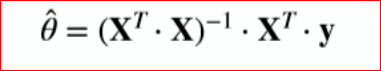

In [17]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [21]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [26]:
y_predict = X_new_b.dot(theta_best)

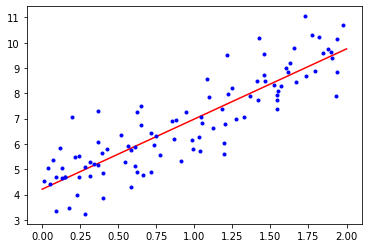

In [28]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

* 사이킷런 LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [32]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

### 경사 하강법을 사용한 선형 회귀

In [33]:
X_b = np.c_[np.ones((100, 1)), X]
X_new_b = np.c_[np.ones((2, 1)), X_new]

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [39]:
theta

array([[4.21509616],
       [2.77011339]])

In [40]:
X_new_b.dot(theta) # X_new [[0], [2]]

array([[4.21509616],
       [9.75532293]])

### 확률적 경사 하강법

In [51]:
m = len(X_b)
np.random.seed(42)

In [53]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]  
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients

In [54]:
theta

array([[4.18545376],
       [2.77900595]])

In [58]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [59]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

### 다항 회귀

In [70]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [75]:
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [76]:
poly_features.get_feature_names()

['x0', 'x0^2']

In [77]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

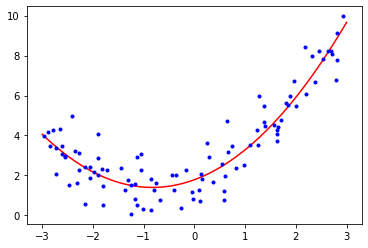

In [90]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

y_new = lin_reg.predict(X_new_poly)

plt.plot(X_new, y_new, "r-")
plt.plot(X, y, 'b.')
plt.show()

### 규제가 있는 모델

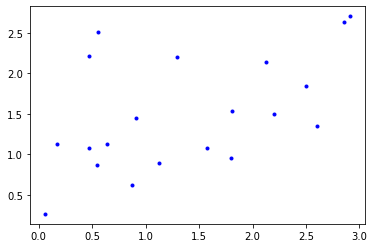

In [91]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 0.5 * X + 1 + np.random.randn(m, 1) / 1.5
plt.plot(X, y, "b.")

#### 선형 모델(규제 없이)

In [111]:
lin_reg = LinearRegression()
lin_reg.fit(X, y.ravel())

lin_reg.predict([[1.5]])

array([1.55355842])

In [112]:
lin_reg.intercept_, lin_reg.coef_   # 0.5x + 1

(0.9757366686668743, array([0.3852145]))

#### 릿지 회귀

In [115]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y.ravel())

ridge_reg.predict([[1.5]])

array([1.55071465])

In [116]:
ridge_reg.intercept_, ridge_reg.coef_  # 규제가 들어갔을때 coef_ 값이 줄어들었음 (intecept_는 규제 안됨)

(1.0065091134341868, array([0.36280369]))

In [103]:
sgd_reg = SGDRegressor(penalty='l2', random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([1.47012588])

#### 라소 회귀

In [105]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X, y.ravel())

lasso_reg.predict([[1.5]])

array([1.50467735])

In [106]:
sgd_reg = SGDRegressor(penalty='l1', random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([1.47011206])

#### 엘라스틱넷

In [108]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(random_state=42)
elastic_net.fit(X, y.ravel())

elastic_net.predict([[1.5]])

array([1.50467735])

In [109]:
sgd_reg = SGDRegressor(penalty='elasticnet', random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([1.47012381])